
<blockquote><center><span style="font-size:20px;">The bad news is that <i>time flies</i>.
The good news is that <i>You're the pilot</i></span></center></blockquote>

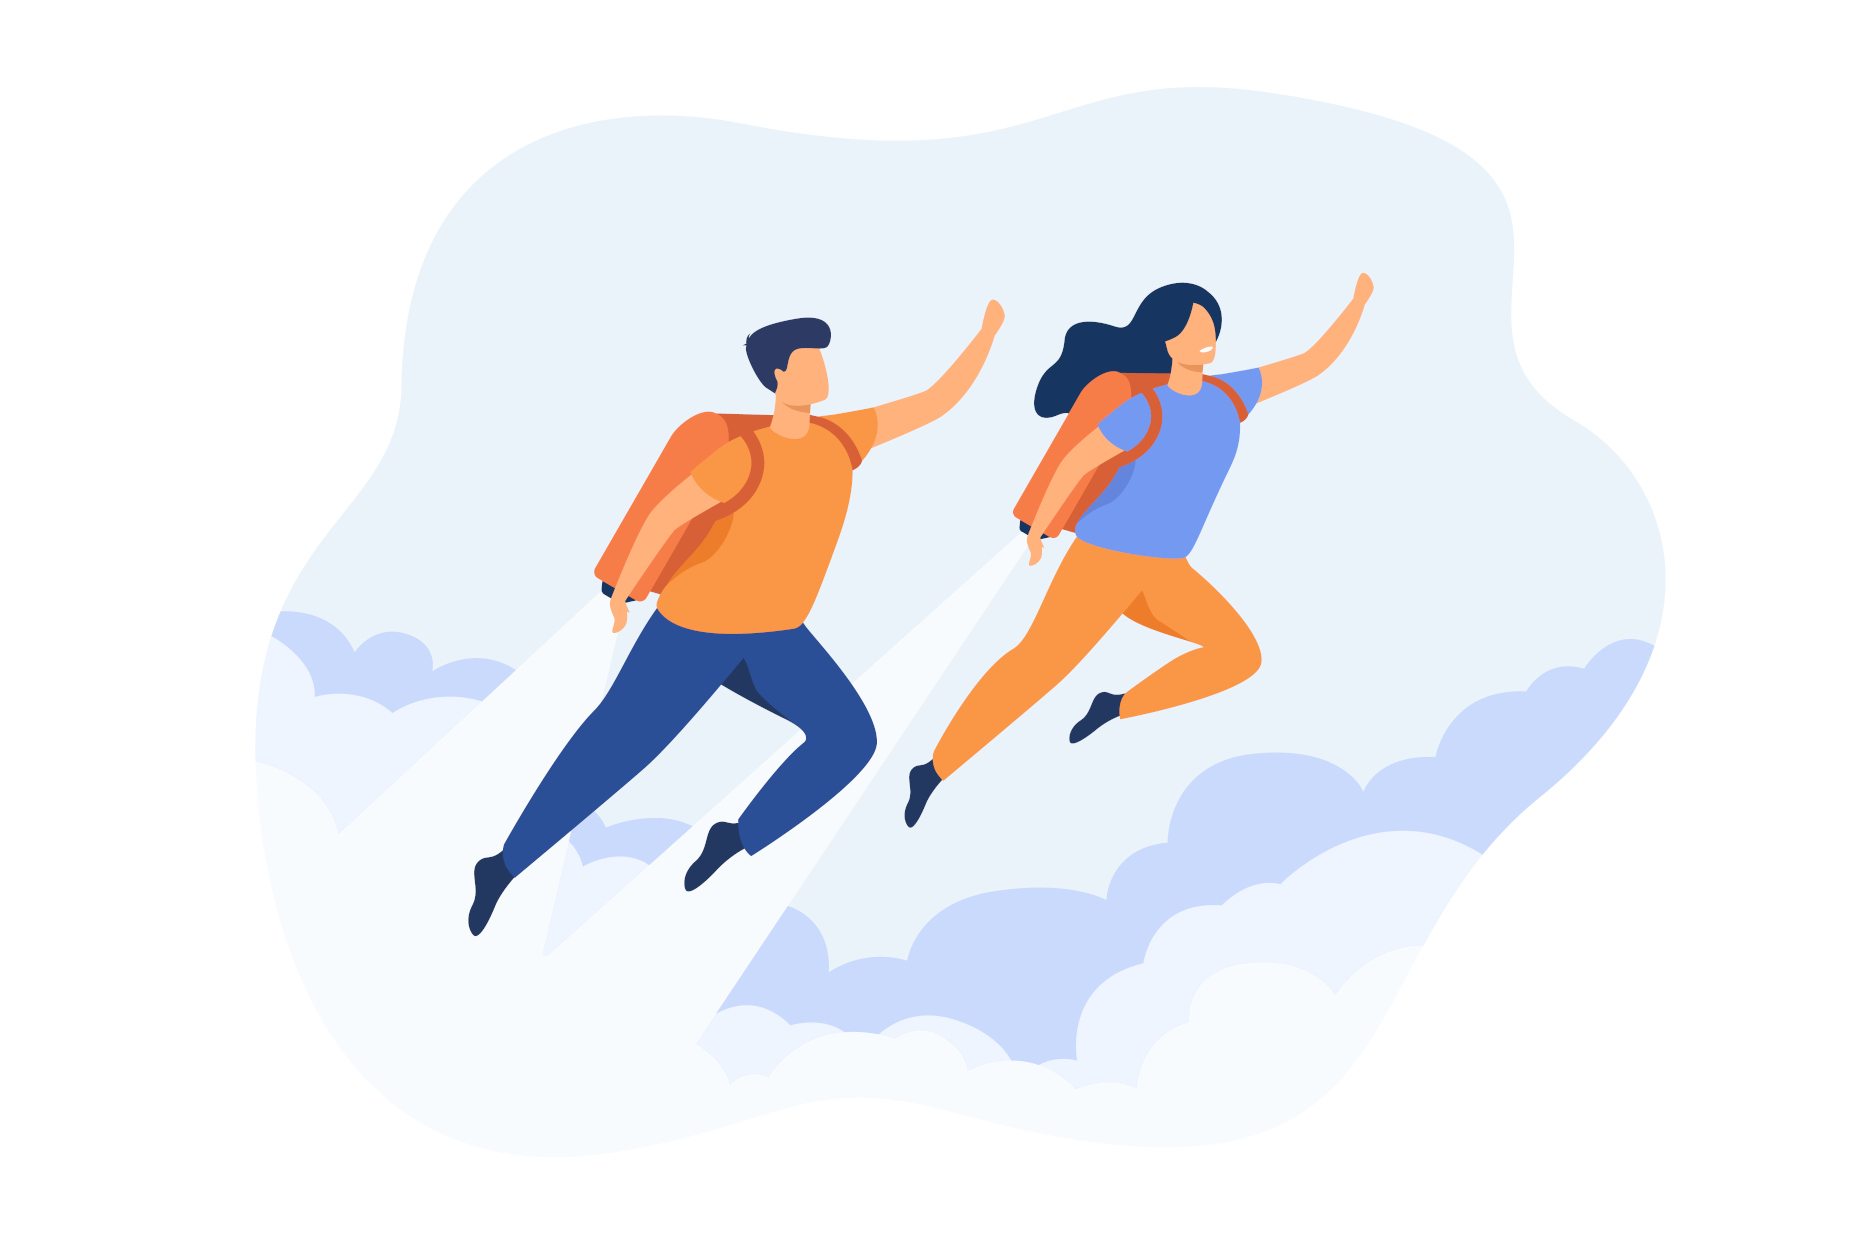
 <a href="https://www.freepik.com/vectors/people">People vector created by pch.vector - www.freepik.com</a> 

I held my morning ☕ and answered the fourth <b>Kaggle DS Survey 2020</b>.<br>A part of me wondered, <span style="font-family:cursive;">Boy! four years already and I'm still a lurker</span>.
The other part marveled at how the questions were a sign of how much Data Science and Machine Learning has come along.
<br>All those exciting mails in the past year about winners explaining their works, launching of TPUs 🎉, walkthroughs for TPU usage and competitions that focussed on GANs. Time definitely is flying! And Kagglers are not just the riders of this jet but very much present in the cockpit.
<br>
<br>This notebook is for you, my fellow Kagglers.
<br>In this notebook I have tried to celebrate just how far we have come along. And I hope justice has been done to the amazing spirit that you bring to this community.

## Reading the responses of surveys that were held for years [2017](https://www.kaggle.com/kaggle/kaggle-survey-2017), [2018](https://www.kaggle.com/kaggle/kaggle-survey-2018/), [2019](https://www.kaggle.com/c/kaggle-survey-2019) & 2020

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd 
import plotly
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import os
survey20 = pd.read_csv('../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv', low_memory = False)

survey19 = pd.read_csv('../input/kaggle-ds-2019-survey-responses/2019.csv', low_memory = False)

survey18 = pd.read_csv('../input/kaggle-survey-2018/multipleChoiceResponses.csv', low_memory = False)

survey17 = pd.read_csv('../input/kaggle-survey-2017/multipleChoiceResponses.csv', encoding='ISO-8859-1', low_memory = False)

# ignore first row since it contains description of questions
survey18 = survey18.drop([0])
survey20 = survey20.drop([0])

### Bringing our chicken into a line
This involves making column names and contents uniform across the four datasets. These include Gender, Age, Formal education and Country columns.
<br>
##### Standardize Selected Gender ♀♂⚧
Let's make Gender column name uniform across the four years in focus.
<br>The gender values were clubbed under the umbrellas of Male, Female and Unspecified.<br>Participants who did not wish to specify their gender or identified themselves as Non-binary were clubbed under the generic term 'Unspecified' due to very small numbers.
<br>For the year 2020, it should be noted that the two genders <i>Male</i> and <i>Female</i> were labeled as <i>Man</i> and <i>Woman</i> respectively.

In [ ]:
# Make the gender column name and content uniform across the 4 years
survey18 = survey18.rename(columns = {'Q1': 'GenderSelect'})
survey19 = survey19.rename(columns = {'What is your gender? - Selected Choice': 'GenderSelect'})
survey20 = survey20.rename(columns = {'Q2': 'GenderSelect'}) 

def gender_umbrella(inp_df):
    inp_df.loc[((inp_df.GenderSelect != 'Female') & (inp_df.GenderSelect != 'Male') ),'GenderSelect'] = 'NonSpecific'
    return inp_df

survey17 = gender_umbrella(survey17)
survey18 = gender_umbrella(survey18)
survey19 = gender_umbrella(survey19)
survey20.loc[((survey20.GenderSelect != 'Woman') & (survey20.GenderSelect != 'Man') ),'GenderSelect'] = 'NonSpecific'

Standardize the Age Representation

In [ ]:
# Make the age representation uniform across the 4 years

survey18 = survey18.rename(columns = {'Q2': 'Age'})
survey19 = survey19.rename(columns = {'What is your age (# years)?': 'Age'})
survey20 = survey20.rename(columns = {'Q1': 'Age'})

def convert_agetorange(input_df):
    bins= [0, 17, 22, 25, 30, 35, 40, 45, 50, 55, 60, 70, 80, 100]
    input_df['AgeGroup'] = None
    labels = ['None','18-21','22-24','25-29','30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70-79', '80+']
    input_df['AgeGroup'] = pd.cut(input_df['Age'], bins = bins, labels = labels, right = False)
    input_df = input_df.drop(columns=['Age'])
    input_df = input_df.rename(columns={'AgeGroup': 'Age'})
    return input_df

survey17 = convert_agetorange(survey17)


Standardize the Formal Education Representation

In [ ]:
# Make the formal education column name and content uniform across the 4 years

survey18 = survey18.rename(columns={'Q4': 'FormalEducation'})
survey19 = survey19.rename(columns={'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?': 'FormalEducation'})
survey20 = survey20.rename(columns={'Q4': 'FormalEducation'})

def uniform_degreenames(input_df):
    input_df['FormalEducation'].replace({"I did not complete any formal education past high school": "High School",
                                         "Some college/university study without earning a bachelor's degree": "Other",
                                         "No formal education past high school": "High School",
                                         "I prefer not to answer": "Unspecified"},
                                        inplace = True)
    return input_df

survey17 = uniform_degreenames(survey17)
survey18 = uniform_degreenames(survey18)
survey19 = uniform_degreenames(survey19)
survey20 = uniform_degreenames(survey20)


Standardize the Country column name and specific country names

In [ ]:
# Make country column name and contents uniform

survey18 = survey18.rename(columns={'Q3': 'Country'})
survey19 = survey19.rename(columns={'In which country do you currently reside?': 'Country'})
survey20 = survey20.rename(columns={'Q3': 'Country'})

def replace_country_names(sdf):
    sdf['Country'].replace({"United States of America":"United States",
                             "Viet Nam":"Vietnam",
                             "People's Republic of China":"China",
                             "Republic of China":"China",
                             "United Kingdom of Great Britain and Northern Ireland":"United Kingdom",
                             "Hong Kong (S.A.R.)":"Hong Kong",
                             "Iran, Islamic Republic of...":"Iran"},
                           inplace = True)
    return sdf

survey17 = replace_country_names(survey17)
survey18 = replace_country_names(survey18)
survey19 = replace_country_names(survey19)
survey20 = replace_country_names(survey20)

Listing down the colors that comprise the palette I had used.

In [ ]:
# Colors that I am using
discrete_colors = ['rgb(191,165,255)',
                   'rgb(136,132,255)',
                   'rgb(131,202,255)',
                   'rgb(129,255,226)',
                   'rgb(184,247,123)',
                   'rgb(185,62,62)',
                   'rgb(161,220,245)',
                   'rgb(247,195,112)',
                   'rgb(59,205,187)',
                   'rgb(219,138,190)',
                   'rgb(187,194,210)',
                   'rgb(164,123,106)',
                   'rgb(169,200,167)',
                   'rgb(88,86,149)',
                   'rgb(144,172,176)',
                   'rgb(108,102,153)',
                   'rgb(159,106,144)']

complementary_colors = ['rgb(122,118,229)',
                        'rgb(207,134,94)',
                        'rgb(162,144,209)',
                        'rgb(157,202,113)',
                        'rgb(83,142,149)']

## The number of Kagglers who took the DS survey over the years
<br>
<i>Some of you don't believe in surveys, while for some of you they are a ball.
<br>
Some of you don't know what boxes to check, some of you want to tick them all.</i>

In [ ]:
lcol = ['Year', 'Count']
len_df = pd.DataFrame(columns = lcol)

len_df = len_df.append({'Year': '2017', 'Count': len(survey17)}, ignore_index = True)
len_df = len_df.append({'Year': '2018', 'Count': len(survey18)}, ignore_index = True)
len_df = len_df.append({'Year': '2019', 'Count': len(survey19)}, ignore_index = True)
len_df = len_df.append({'Year': '2020', 'Count': len(survey20)}, ignore_index = True)

fig = px.bar(len_df, x = 'Year', y = 'Count', color = 'Year', color_discrete_sequence = discrete_colors)
fig.show()

<b>Kaggle DS Survey</b> started in the year 2017 and got a promising response. The numbers grew whoppingly next year with more people joining the community. Somehow the numbers dipped the next year, probably because of the extensive questions and time it needed to be answered. The year 2020 meant a majority of you spending time on video calls rather than actual work. Bet many of you took the survey while sitting in a boring VC 😆
<br>
## How Gender Figures changed over the Four Surveys
Let's see how the gender specific survey numbers varied over the four years. 

In [ ]:
# Gender distribution over the years

def populate_gender_count(inp_df, year, out_df):    
    male_searchstr = 'Male'
    fem_searchstr = 'Female'
    if year == 2020:
        male_searchstr = 'Man'
        fem_searchstr = 'Woman'
        
    out_df = out_df.append({'Year': year,
                            'Gender': 'Female',
                            'Count': len(inp_df[inp_df['GenderSelect'] == fem_searchstr])}, ignore_index = True)
    out_df = out_df.append({'Year': year,
                            'Gender': 'Male',
                            'Count': len(inp_df[inp_df['GenderSelect'] == male_searchstr])}, ignore_index = True)
    out_df = out_df.append({'Year': year,
                            'Gender': 'NonSpecific',
                            'Count': len(inp_df[inp_df['GenderSelect'] == 'NonSpecific'])}, ignore_index = True)

    return out_df

columns = ['Year', 'Gender', 'Count']
year_gender_df = pd.DataFrame(columns = columns)

year_gender_df = populate_gender_count(survey17, 2017, year_gender_df)
year_gender_df = populate_gender_count(survey18, 2018, year_gender_df)
year_gender_df = populate_gender_count(survey19, 2019, year_gender_df)
year_gender_df = populate_gender_count(survey20, 2020, year_gender_df)

fig = px.bar(year_gender_df,
             x = "Gender",
             y = "Count",
             animation_frame = "Year",
             color = "Gender",
             hover_name = "Count",
             color_discrete_sequence = discrete_colors,
             range_y = [0, 20000])

fig.show()

<span style="font-size:16px;">Here's to hoping that girl geeks touch 5K next year 🤞</span>

## Let's talk about Sex Ratio

The participants of Kaggle DS survey come form different countries with their unique socio-economic makeup. Instead of going by the sex ratio designated by an external agency, I considered the gender ratio specific to the Kaggle community.
    
<br>As seen in the previous figures, <span style="color:green;">males make up the majority of the community</span>.
<br>If I had calculated a sex ratio based on gender counts in the Kaggle survey datasets, the numbers would have been in extreme decimal values.
<br>So I calculated the male percentage from 2017 survey dataset and picked ten countries with lowest male percentage to label them as countries with better sex ratio on Kaggle. And ten countries with highest male percentage were labled as having a skewed sex ratio in terms of the Kaggle community.
    
<br>Also, due to extremely high number of participants from the United States, I removed it from the second category of countries to keep the numbers upto scale.
    
<br>So for the ten countries with lowest male percentages, here is how the numbers changed for males and the rest of genders across the four years.

In [ ]:
# Ten countries that reported highest and lowest sex ratios in the year 2017

gs17_df = survey17[["GenderSelect", "Country"]]

gs17_df = (gs17_df.assign(Helper = (gs17_df['GenderSelect'] == 'Male'))
        .groupby(['Country'])['Helper']
        .agg([('MaleCount','sum'),('Count','size')])
        .astype(int)
        .reset_index())

gs17_df['MalePercentage'] = gs17_df['MaleCount'] / gs17_df['Count'] * 100

# Countries where male participant percentage was minimum compared to rest of world
balancdratio17_df = gs17_df.sort_values(by = ['MalePercentage']).head(11)
countries_balancedgender = balancdratio17_df['Country'].unique()

# Get counts for shortlisted countries only
# First for countries with somewhat balanced ratios ( = lowest male percentage in survey dataset)

bcolumns = ['Year', 'Country', 'Gender', 'Count']
year_balgender_df = pd.DataFrame(columns = bcolumns)

def append_plotdf(bal_df, country, year, balgender_df):
    cdf = bal_df[bal_df['Country'].str.contains(str(country), regex=False)]
    
    gender_searchstr = "Male"
    if year == 2020:
        gender_searchstr = "Man"
    
    balgender_df = balgender_df.append({'Year': year,
                                                  'Country': country,
                                                  'Gender': 'Male',
                                                  'Count': len(cdf[cdf['GenderSelect'] == gender_searchstr])}, ignore_index = True)
    
    balgender_df = balgender_df.append({'Year': year,
                                                  'Country': country,
                                                  'Gender': 'Others',
                                                  'Count': len(cdf[cdf['GenderSelect'] != gender_searchstr])}, ignore_index = True)
    return balgender_df
    
def populate_genderplotdf(surveydf, country_list, year, year_gender_df):
    bal_df = surveydf[surveydf['Country'].isin(country_list)]
    for country in country_list:
        if country == 'United States':
            i = 0
        else:
            year_gender_df = append_plotdf(bal_df, country, year, year_gender_df)
    return year_gender_df
    
year_balgender_df = populate_genderplotdf(survey17, countries_balancedgender, 2017, year_balgender_df)
year_balgender_df = populate_genderplotdf(survey18, countries_balancedgender, 2018, year_balgender_df)
year_balgender_df = populate_genderplotdf(survey19, countries_balancedgender, 2019, year_balgender_df)
year_balgender_df = populate_genderplotdf(survey20, countries_balancedgender, 2020, year_balgender_df)

fig = px.bar(year_balgender_df,
             x = "Country",
             y = "Count",
             animation_frame = "Year",
             color = "Gender",
             color_discrete_sequence = complementary_colors,
             title="How Gender-wise Figures changed for Countries with Low Male Percentage (2017-2020)",
             hover_name = "Count",
             range_y = [0, 1700])

fig.show()



The countries that had largest share of male participants in the Kaggle DS survey were considered to have a skewed sex ratio in the Kaggle community. Let's see how their numbers changed over the four years.
<br>Kagglers from Norway, Denmark and Czech Repulic, we missed you in 2020!

In [ ]:

# Countries where male participant percentage was highest compared to rest of world
skewedratio17_df = gs17_df.sort_values(by = ['MalePercentage']).tail(10)
countries_skewedgender = skewedratio17_df['Country'].unique()
#print (countries_skewedgender)

year_skewdgender_df = pd.DataFrame(columns = bcolumns)

#plotting for skewed ratios
year_skewdgender_df = populate_genderplotdf(survey17, countries_skewedgender, 2017, year_skewdgender_df)
year_skewdgender_df = populate_genderplotdf(survey18, countries_skewedgender, 2018, year_skewdgender_df)
year_skewdgender_df = populate_genderplotdf(survey19, countries_skewedgender, 2019, year_skewdgender_df)
year_skewdgender_df = populate_genderplotdf(survey20, countries_skewedgender, 2020, year_skewdgender_df)

fig = px.bar(year_skewdgender_df,
             x = "Country",
             y = "Count",
             animation_frame = "Year",
             color = "Gender",
             color_discrete_sequence = complementary_colors,
             title="How Gender-wise Figures changed for Countries with High Male Percentage (2017-2020)",
             hover_name = "Count",
             range_y=[0, 800])

fig.show()

## Age distributions over the four years
Over the past four years, have Kagglers grown older? Or do we have young blood joining in bigger numbers?
<br><br><i>Abracadabra! O Numbers! Do tell us so...</i>

In [ ]:
# How Age distribution changed over years 2017-2020

countdf_17 = survey17.groupby(['Age']).Age.agg('count').to_frame('Count').reset_index()
countdf_18 = survey18.groupby(['Age']).Age.agg('count').to_frame('Count').reset_index()
countdf_19 = survey19.groupby(['Age']).Age.agg('count').to_frame('Count').reset_index()
countdf_20 = survey20.groupby(['Age']).Age.agg('count').to_frame('Count').reset_index()

import plotly.graph_objects as go
from plotly.subplots import make_subplots
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
    
fig = make_subplots(rows = 2, cols = 2, specs = specs, subplot_titles=['2017', '2018', '2019', '2020'])
fig.add_trace(go.Pie(labels = countdf_17.Age,
                     values = countdf_17.Count,
                     name="2017"),
              1, 1)
fig.add_trace(go.Pie(labels = countdf_18.Age,
                     values = countdf_18.Count,
                     name="2018"),
              1, 2)
fig.add_trace(go.Pie(labels = countdf_19.Age,
                     values = countdf_19.Count,
                     name="2019"),
              2, 1)
fig.add_trace(go.Pie(labels = countdf_20.Age,
                     values = countdf_20.Count,
                     name="2020"),
              2, 2)

fig.update_traces(hole=.4)
fig.update_layout(title_text = "Ages of Kagglers from 2017-2020")
fig.show()

The first survey in the year 2017 saw majority of Kagglers of ages from mid-twenties to mid-thirties.
<br>The next year saw more participants who were in late teens and early twenties. They gained prominence and have been showing an increase in their presence since the year 2018.
<br>And.. A shout-out to the silver Kagglers who have taught us that it is never too late to learn new things 👏
<br>Verdict? <span style="color:green;">Young blood is joining the Kaggle community in big numbers.

## Formal Education Distribution over the four years
Now let's see what degrees 🤓 the Kagglers hold and how their numbers changed over the four surveys.


In [ ]:
# How Education distribution changed over years 2017-2020

fecdf_17 = survey17.groupby(['FormalEducation']).FormalEducation.agg('count').to_frame('Count').reset_index()
fecdf_18 = survey18.groupby(['FormalEducation']).FormalEducation.agg('count').to_frame('Count').reset_index()
fecdf_19 = survey19.groupby(['FormalEducation']).FormalEducation.agg('count').to_frame('Count').reset_index()
fecdf_20 = survey20.groupby(['FormalEducation']).FormalEducation.agg('count').to_frame('Count').reset_index()

import plotly.graph_objects as go
from plotly.subplots import make_subplots
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
    
fig = make_subplots(rows = 2, cols = 2, specs = specs, subplot_titles=['2017', '2018', '2019', '2020'])
fig.add_trace(go.Pie(labels = fecdf_17.FormalEducation,
                     values = fecdf_17.Count,
                     name="2017"),
              1, 1)
fig.add_trace(go.Pie(labels = fecdf_18.FormalEducation,
                     values = fecdf_18.Count,
                     name="2018"),
              1, 2)
fig.add_trace(go.Pie(labels = fecdf_19.FormalEducation,
                     values = fecdf_19.Count,
                     name="2019"),
              2, 1)
fig.add_trace(go.Pie(labels = fecdf_20.FormalEducation,
                     values = fecdf_20.Count,
                     name="2020"),
              2, 2)

fig.update_traces(hole=.4)

fig.update_layout(title_text = "Formal Education among Kagglers from 2017-2020")
fig.show()

<span style="color:green;">Hands down the majority of Kagglers hold a Master's degree.</span>
<br>It is interesting to see that while Bachelor's degree has been a close second, it still has a decent gap to catch up to the popularity of Master's degree. On the other hand, in the year 2020 it ate into the portion of Kagglers who have completed Doctorate. This could probably be attributed to the increased presence of youngsters in the 2020 DS survey and the increasing popularity of Data science as a prospective career among college-goers.
<br>Lastly, around 10 percent of Kagglers hold diploma/degrees that are different from the mainstream Bachelor's. This enforces the fact that certifications and courses can also get you on track when pursuing a career in data sciences.

### Countries with high and low literacy indicators
While only a small percentage (~10%) of Kagglers did not hold a Bachelor's degree, data science is definitely an advanced field.
<br>But what is the effect of a country's education policies on a Kaggler?
<br>Which participating countries make up the extremes of the spectrum if we consider literacy as an indicator?
<br>Moreover, what were the trends followed by these countries over the past four years?
<br><br>To answer these questions, I queried the social indicator Youth literacy rate for 15-24 year olds from</span> [UNICEF data warehouse for the year 2017](http://data.unicef.org/resources/data_explorer/unicef_f/?ag=UNICEF&df=GLOBAL_DATAFLOW&ver=1.0&dq=.ED_ANAR_L2+ED_15-24_LR._T.&startPeriod=2016&endPeriod=2020) 
This decision was based on the knowledge that youngsters are forming a big share of Kaggle community. 
<br>A number of countries that were present in Kaggle DS dataset were missing in the UNICEF data. So let's focus on the countries that were present in both the UNICEF data and the Kaggle survey datasets.


In [ ]:
unicef_flnm = '../input/unicef-youth-literacy-rate-among-1524-year-olds/UNICEF_Literacy.csv'
unicef_df = pd.read_csv(unicef_flnm, low_memory = False)

# trimming off features that are not required
unicef_df = unicef_df[['Geographic area', 'Sex', 'OBS_VALUE']]
#unicef_df.info()

# Finding countries in Kaggle Survey DS that reported low & high literacy rates acc to Unicef (2017)
df3 = survey17.merge(unicef_df, left_on = ['Country', 'GenderSelect'], right_on = ['Geographic area', 'Sex'], how = 'left')

df3 = df3[['Country', 'GenderSelect', 'OBS_VALUE']]
df3 = df3.dropna()
df3 = df3.drop_duplicates(subset=['Country', 'GenderSelect'])
male_lowlitdf = df3[df3.GenderSelect == 'Male'].sort_values(['OBS_VALUE']).head(3)
male_hilitdf = df3[df3.GenderSelect == 'Male'].sort_values(['OBS_VALUE']).tail(3)

female_lowlitdf = df3[df3.GenderSelect == 'Female'].sort_values(['OBS_VALUE']).head(3)
female_hilitdf = df3[df3.GenderSelect == 'Female'].sort_values(['OBS_VALUE']).tail(3)

lowlit_countries = list(set(male_lowlitdf.Country) & set(female_lowlitdf.Country))
print ("Countries in Kaggle DS Survey that had lowest youth literacy rate (2017)", lowlit_countries)

hilit_countries = list(set(male_hilitdf.Country) & set(female_hilitdf.Country))
print ("Countries in Kaggle DS Survey that had highest youth literacy rate (2017)", hilit_countries)

The countries that were common in the UNICEF youth literacy data and Kaggle DS Survey 2017 were ranked according to male and female literacy figures.
<br>An intersection of both genders was used to shortlist the three countries that had lowest youth literacy rate, and resulted in <span style="color:green;">Kenya, Nigeria and India</span>.
<br>While the intersection of both genders used to shortlist the three countries that had highest youth literacy rate resulted in <span style="color:green;">Singapore, Belarus and Italy</span>.
<br><br>First I plotted the variation in numbers for reported degrees held by the survey participants for Kenya, Nigeria and India.

In [ ]:
# What was the distribution of formal education for countries at the extremes of literacy rates

ecolumns = ['Year', 'Country', 'FormalEducation', 'Count']
# degrees-wise counts for each of the four years for shortlisted countries
year_lowlit_df = pd.DataFrame(columns = ecolumns)
    
def populate_litplotdf(surveydf, country_list, year, year_lit_df):
    lit_df = surveydf[surveydf['Country'].isin(country_list)]
    #print (lit_df.shape)
    for country in country_list:
        cdf = surveydf[surveydf['Country'].str.contains(str(country), regex = False, na = False)]
        cdf = cdf[cdf['FormalEducation'].notna()]
        degree_names = cdf['FormalEducation'].unique()
        
        for deg in degree_names:
            year_lit_df = year_lit_df.append({'Year': year,
                                              'Country': country,
                                              'FormalEducation': deg,
                                              'Count': len(cdf[cdf['FormalEducation'] == deg])}, ignore_index = True)
    return year_lit_df

year_lowlit_df = populate_litplotdf(survey17, lowlit_countries, 2017, year_lowlit_df)
year_lowlit_df = populate_litplotdf(survey18, lowlit_countries, 2018, year_lowlit_df)
year_lowlit_df = populate_litplotdf(survey19, lowlit_countries, 2019, year_lowlit_df)
year_lowlit_df = populate_litplotdf(survey20, lowlit_countries, 2020, year_lowlit_df)

fig = px.bar(year_lowlit_df,
             x = "Country",
             y = "Count",
             animation_frame = "Year",
             color = "FormalEducation",
             color_discrete_sequence = discrete_colors,
             title="Degree Distribution for Low Youth Literacy Nations (2017-2020)",
             hover_name = "Count",
             range_y=[0, 6000])
fig.show()

While participants from India were very much in larger numbers than the other two countries since 2017, the growth in number of Kagglers from India has been huge over the four years. Clearly showing <span style="color:green;">India as one of the emerging hubs of data science and machine learning enthusiasts.</span> It can also be said that the new Kagglers from India are from the younger lot due to increase in number of participants who hold a Bachelor's degree. Catch 'em young India!
<br><br>Now let's see the variation in numbers for reported degrees held by the survey participants for Singapore, Belarus and Italy.

In [ ]:
year_hilit_df = pd.DataFrame(columns = ecolumns)

year_hilit_df = populate_litplotdf(survey17, hilit_countries, 2017, year_hilit_df)
year_hilit_df = populate_litplotdf(survey18, hilit_countries, 2018, year_hilit_df)
year_hilit_df = populate_litplotdf(survey19, hilit_countries, 2019, year_hilit_df)
year_hilit_df = populate_litplotdf(survey20, hilit_countries, 2020, year_hilit_df)

fig = px.bar(year_hilit_df,
             x = "Country",
             y = "Count",
             animation_frame = "Year",
             color = "FormalEducation",
             color_discrete_sequence = discrete_colors,
             title="Degree Distribution for High Youth Literacy Nations (2017-2020)",
             hover_name = "Count",
             range_y = [0, 400])
fig.show()

The number of participants from Singapore, Belarus and Italy have remained somewhat comparable. <span style="color:green;">An observation that has emerged is that the holders of doctoral degree here are seen in larger numbers as compared to the ones from lower literacy rate countries.</span>
<br>Additionally, Master's degree has ruled the roost and grown in number over the years along with the doctoral degree figures. 